In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
!pip install nltk
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
from google.colab import drive
drive.mount('/gdrive')
CSV_DATA = "/gdrive/My Drive/Colab Notebooks/ingredients.csv" 
data = pd.read_csv(CSV_DATA)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [51]:
data = data['ingredient name'].tolist()
type(data)

list

In [55]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
data_cleaned=[]
for line in data: 
  tokenized_text=tokenizer.tokenize(line)
  data_cleaned.extend(tokenized_text)
len(data_cleaned)

10730

In [0]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

data_lemmatized=[]
for w in data_cleaned:
    data_lemmatized.append(lem.lemmatize(w,"v"))

In [60]:
#Frequency
from nltk.probability import FreqDist
fdist = FreqDist(data_lemmatized)
print(fdist)

<FreqDist with 2061 samples and 10730 outcomes>


In [61]:
fdist.most_common(20)

[('chicken', 150),
 ('cheese', 114),
 ('sauce', 111),
 ('fresh', 99),
 ('bean', 95),
 ('beef', 90),
 ('pepper', 89),
 ('rice', 88),
 ('dry', 87),
 ('fat', 87),
 ('grind', 84),
 ('pork', 83),
 ('white', 74),
 ('green', 73),
 ('flour', 71),
 ('oil', 69),
 ('red', 69),
 ('roast', 68),
 ('bread', 66),
 ('cream', 65)]

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text=(" ").join(data_lemmatized)


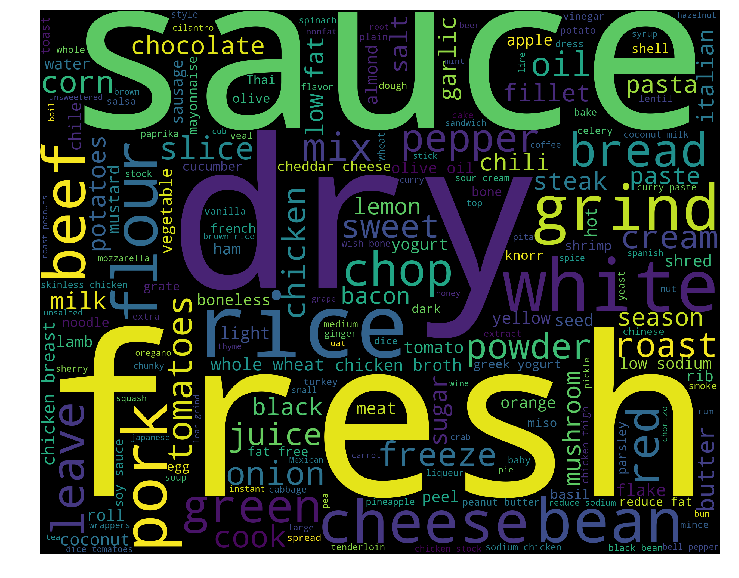

In [68]:
wordcloud = WordCloud(width=2500,height=2000).generate(text)
plt.figure(1,figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()